In [1]:
# Dependencies
import requests
import os
import gmaps
import datetime 
import pandas as pd
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt

from config import weather_key

In [17]:
# Open Weather pollution attempt

base_url = "http://api.openweathermap.org/data/2.5/air_pollution/history?"

# Params
#lat={lat}&lon={lon}&start={start}&end={end}&appid={API key}

# Portland lat lng
#lat = 45.5051
#lng = 122.6750

# Rerunning with Bakersfield lat lng
# 35.3733° N, 119.0187° W
#lat = 35.3733
#lng = 119.0187

# Rerunning with New York lat lng
#40.7128° N, 74.0060° W
lat = 40.7128
lng = 74.0060

startDate = pd.Timestamp('2020-12-01T12').timestamp()
#startDate = "1577836861"

endDate = pd.Timestamp('2021-02-01T12').timestamp()
#endDate = "1580428861"

ser = pd.Series([startDate, endDate], dtype='int32')

startDate = ser[0]

endDate = ser[1]

param_url = f'lat={lat}&lon={lng}&start={startDate}&end={endDate}&appid={weather_key}'

response = requests.get(base_url + param_url)
measurement_data = response.json()
#measurement_data

measurements_df = pd.DataFrame(measurement_data["list"])
#for loop?
#measurements_df["datetime"] = pd.Timestamp(measurements_df["dt"], unit='s', tz='US/Pacific')
#print(places_data["results"][0]["name"])
#print(places_data["results"][0]["vicinity"])
#measurements_df = measurements_df[:,"datetime"]
measurements_df
                                                           
#test_url = base_url + param_url
#test_url
#startDate
#endDate

,main,components,dt
0,{'aqi': 1},"{'co': 185.25, 'no': 0.17, 'no2': 3.86, 'o3': ...",1612180800
1,{'aqi': 1},"{'co': 186.92, 'no': 0.51, 'no2': 4.24, 'o3': ...",1612177200
2,{'aqi': 2},"{'co': 185.25, 'no': 0.59, 'no2': 3.86, 'o3': ...",1612173600
3,{'aqi': 2},"{'co': 185.25, 'no': 0.72, 'no2': 3.3, 'o3': 8...",1612170000
4,{'aqi': 2},"{'co': 185.25, 'no': 0.84, 'no2': 2.96, 'o3': ...",1612166400
...,...,...,...
1460,{'aqi': 1},"{'co': 166.89, 'no': 0, 'no2': 1.8, 'o3': 72.9...",1606838400
1461,{'aqi': 1},"{'co': 166.89, 'no': 0, 'no2': 2.4, 'o3': 74.3...",1606834800
1462,{'aqi': 1},"{'co': 166.89, 'no': 0, 'no2': 2.91, 'o3': 76....",1606831200
1463,{'aqi': 1},"{'co': 166.89, 'no': 0, 'no2': 3.26, 'o3': 77....",1606827600


In [22]:
#Date and measurement conversion attempts
for index, row in measurements_df.iterrows():
    
    # Capture and convert data from UNIX time
    currentDate = measurements_df.loc[index, "dt"]
    currentDate = pd.Timestamp(currentDate, unit='s')
    
    # Capture singular AQI
    main = measurements_df.loc[index, "main"]
    aqi = main["aqi"]
    
    # Capture components breakdown
    components = measurements_df.loc[index, "components"]
    co = components["co"]
    no = components["no"]
    no2 = components["no2"]
    o3 = components["o3"]
    so2 = components["so2"]
    pm2_5 = components["pm2_5"]
    pm10 = components["pm10"]
    nh3 = components["nh3"]
    
    # Captured data to new dataframe columns
    measurements_df.loc[index, "datetime"] = currentDate
    
    measurements_df.loc[index, "co"] = co
    measurements_df.loc[index, "no"] = no
    measurements_df.loc[index, "no2"] = no2
    measurements_df.loc[index, "o3"] = o3
    measurements_df.loc[index, "so2"] = so2
    measurements_df.loc[index, "pm2_5"] = pm2_5
    measurements_df.loc[index, "pm10"] = pm10
    measurements_df.loc[index, "nh3"] = nh3
    #break
    
    measurements_df.loc[index, "aqi"] = aqi
    
    
measurements_df
#components

,main,components,dt,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi
0,{'aqi': 1},"{'co': 185.25, 'no': 0.17, 'no2': 3.86, 'o3': ...",1612180800,2021-02-01 12:00:00,185.25,0.17,3.86,78.68,2.56,8.06,9.41,1.19,1.0
1,{'aqi': 1},"{'co': 186.92, 'no': 0.51, 'no2': 4.24, 'o3': ...",1612177200,2021-02-01 11:00:00,186.92,0.51,4.24,77.25,2.62,8.16,9.45,2.06,1.0
2,{'aqi': 2},"{'co': 185.25, 'no': 0.59, 'no2': 3.86, 'o3': ...",1612173600,2021-02-01 10:00:00,185.25,0.59,3.86,80.82,2.56,8.23,9.66,2.69,2.0
3,{'aqi': 2},"{'co': 185.25, 'no': 0.72, 'no2': 3.3, 'o3': 8...",1612170000,2021-02-01 09:00:00,185.25,0.72,3.30,85.12,2.38,8.00,9.53,3.10,2.0
4,{'aqi': 2},"{'co': 185.25, 'no': 0.84, 'no2': 2.96, 'o3': ...",1612166400,2021-02-01 08:00:00,185.25,0.84,2.96,85.83,1.91,6.86,8.30,3.23,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,{'aqi': 1},"{'co': 166.89, 'no': 0, 'no2': 1.8, 'o3': 72.9...",1606838400,2020-12-01 16:00:00,166.89,0.00,1.80,72.96,0.68,0.56,0.59,0.70,1.0
1461,{'aqi': 1},"{'co': 166.89, 'no': 0, 'no2': 2.4, 'o3': 74.3...",1606834800,2020-12-01 15:00:00,166.89,0.00,2.40,74.39,0.83,0.62,0.64,0.75,1.0
1462,{'aqi': 1},"{'co': 166.89, 'no': 0, 'no2': 2.91, 'o3': 76....",1606831200,2020-12-01 14:00:00,166.89,0.00,2.91,76.53,0.93,0.65,0.67,0.78,1.0
1463,{'aqi': 1},"{'co': 166.89, 'no': 0, 'no2': 3.26, 'o3': 77....",1606827600,2020-12-01 13:00:00,166.89,0.00,3.26,77.25,0.92,0.67,0.69,0.77,1.0


(array([737760., 737767., 737774., 737781., 737791., 737798., 737805.,
        737812., 737822.]), <a list of 9 Text major ticklabel objects>)

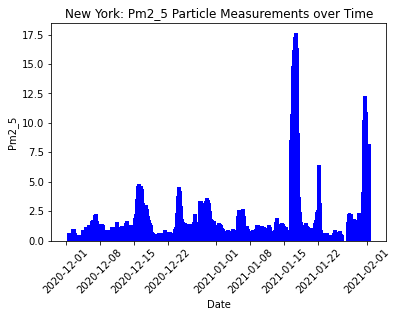

In [25]:
# New York

# Set plotted values
x_values = measurements_df["datetime"]
y_values = measurements_df["pm2_5"]

# Capture date for title banner
#currentDate = pd.Timestamp.today()
#currentDate = currentDate.date()

# Plot
plt.bar(x_values,y_values, color='blue')
plt.title(f'New York: Pm2_5 Particle Measurements over Time')
plt.ylabel('Pm2_5')
plt.xlabel('Date')
plt.xticks(rotation=45)

(array([737760., 737767., 737774., 737781., 737791., 737798., 737805.,
        737812., 737822.]), <a list of 9 Text major ticklabel objects>)

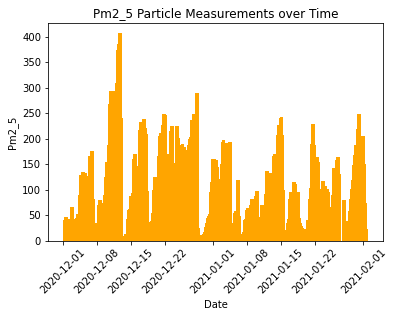

In [14]:
#Bakersfield - preserving output

# Set plotted values
x_values = measurements_df["datetime"]
y_values = measurements_df["pm2_5"]

# Capture date for title banner
#currentDate = pd.Timestamp.today()
#currentDate = currentDate.date()

# Plot
plt.bar(x_values,y_values, color='orange')
plt.title(f'Pm2_5 Particle Measurements over Time')
plt.ylabel('Pm2_5')
plt.xlabel('Date')
plt.xticks(rotation=45)

(array([737760., 737767., 737774., 737781., 737791., 737798., 737805.,
        737812., 737822.]), <a list of 9 Text major ticklabel objects>)

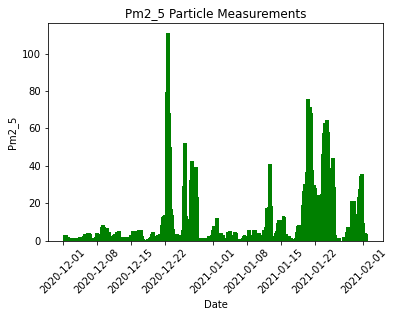

In [8]:
#Portland - preserving output

# Set plotted values
x_values = measurements_df["datetime"]
y_values = measurements_df["pm2_5"]

# Capture date for title banner
#currentDate = pd.Timestamp.today()
#currentDate = currentDate.date()

# Plot
plt.bar(x_values,y_values, color='green')
plt.title(f'Pm2_5 Particle Measurements over Time')
plt.ylabel('Pm2_5')
plt.xlabel('Date')
plt.xticks(rotation=45)

(array([737760., 737767., 737774., 737781., 737791., 737798., 737805.,
        737812., 737822.]), <a list of 9 Text major ticklabel objects>)

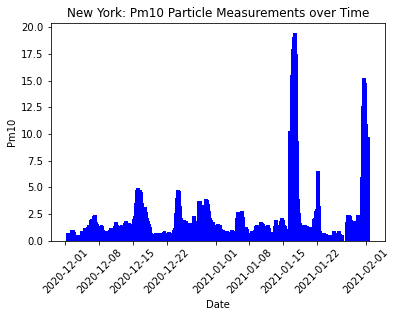

In [23]:
# New York

# Set plotted values
x_values = measurements_df["datetime"]
y_values = measurements_df["pm10"]

# Capture date for title banner
#currentDate = pd.Timestamp.today()
#currentDate = currentDate.date()

# Plot
plt.bar(x_values,y_values, color='blue')
plt.title(f'New York: Pm10 Particle Measurements over Time')
plt.ylabel('Pm10')
plt.xlabel('Date')
plt.xticks(rotation=45)

(array([737760., 737767., 737774., 737781., 737791., 737798., 737805.,
        737812., 737822.]), <a list of 9 Text major ticklabel objects>)

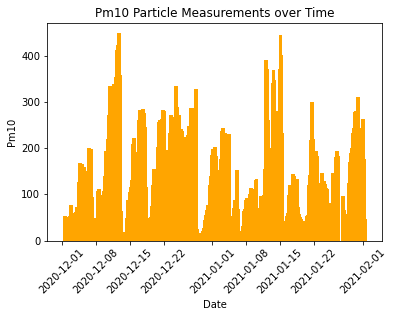

In [15]:
#Bakersfield - preserving output

# Set plotted values
x_values = measurements_df["datetime"]
y_values = measurements_df["pm10"]

# Capture date for title banner
#currentDate = pd.Timestamp.today()
#currentDate = currentDate.date()

# Plot
plt.bar(x_values,y_values, color='orange')
plt.title(f'Pm10 Particle Measurements over Time')
plt.ylabel('Pm10')
plt.xlabel('Date')
plt.xticks(rotation=45)

(array([737760., 737767., 737774., 737781., 737791., 737798., 737805.,
        737812., 737822.]), <a list of 9 Text major ticklabel objects>)

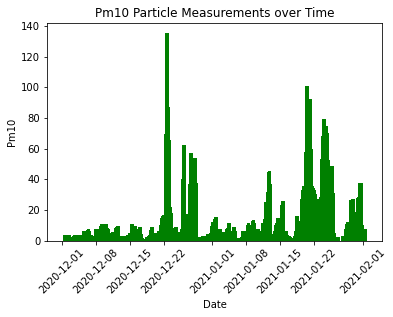

In [11]:
# Portland - preserving output

# Set plotted values
x_values = measurements_df["datetime"]
y_values = measurements_df["pm10"]

# Capture date for title banner
#currentDate = pd.Timestamp.today()
#currentDate = currentDate.date()

# Plot
plt.bar(x_values,y_values, color='green')
plt.title(f'Pm10 Particle Measurements over Time')
plt.ylabel('Pm10')
plt.xlabel('Date')
plt.xticks(rotation=45)

(array([737760., 737767., 737774., 737781., 737791., 737798., 737805.,
        737812., 737822.]), <a list of 9 Text major ticklabel objects>)

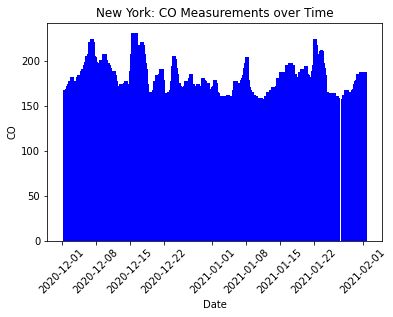

In [24]:
#New York

# Set plotted values
x_values = measurements_df["datetime"]
y_values = measurements_df["co"]

# Capture date for title banner
#currentDate = pd.Timestamp.today()
#currentDate = currentDate.date()

# Plot
plt.bar(x_values,y_values, color='blue')
plt.title(f'New York: CO Measurements over Time')
plt.ylabel('CO')
plt.xlabel('Date')
plt.xticks(rotation=45)

(array([737760., 737767., 737774., 737781., 737791., 737798., 737805.,
        737812., 737822.]), <a list of 9 Text major ticklabel objects>)

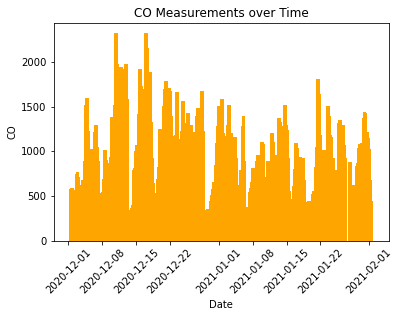

In [16]:
#Bakersfield - preserving output

# Set plotted values
x_values = measurements_df["datetime"]
y_values = measurements_df["co"]

# Capture date for title banner
#currentDate = pd.Timestamp.today()
#currentDate = currentDate.date()

# Plot
plt.bar(x_values,y_values, color='orange')
plt.title(f'CO Measurements over Time')
plt.ylabel('CO')
plt.xlabel('Date')
plt.xticks(rotation=45)

(array([737760., 737767., 737774., 737781., 737791., 737798., 737805.,
        737812., 737822.]), <a list of 9 Text major ticklabel objects>)

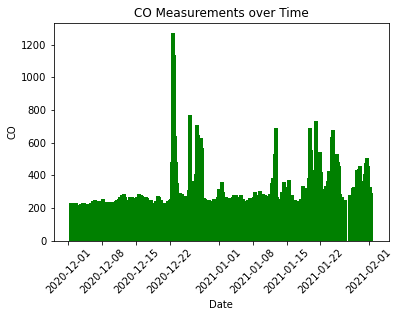

In [10]:
#Portland - preserving output

# Set plotted values
x_values = measurements_df["datetime"]
y_values = measurements_df["co"]

# Capture date for title banner
#currentDate = pd.Timestamp.today()
#currentDate = currentDate.date()

# Plot
plt.bar(x_values,y_values, color='green')
plt.title(f'CO Measurements over Time')
plt.ylabel('CO')
plt.xlabel('Date')
plt.xticks(rotation=45)